In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LinearRegression, LogisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 0)


##### **I. Reading the dataset**

In [2]:
df = pd.read_csv('C:/Machine Learning Training/Machine Learning Zoomcamp Notes/datasets/kaggle_telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### **II. Data Cleaning**

In [4]:
# Making the column names consistent
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
# We also clean the values of each categorical column
# making them lowercase and fixing the spaces 
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
#seniorcitizen must be of object type
df.seniorcitizen = df.seniorcitizen.astype('object')

In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
##totalcharges must be a number
#df.totalcharges.astype('float')
#An error will occur
#This is beacause space in the dataset indicates missing
#but we converted it into underscore
#We can check if this is true like this:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
tc.isnull().sum()

11

In [11]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')
#We can fill these missing values with 0, to make it easier for now
#Coincidentally, the missing values are really valid to be replaced by 0 in our dataset
#It is because these are the records who has a tenure of 0, that's why they still
#don't incur any charges as of the time of record
df.totalcharges = df.totalcharges.fillna(df.tenure*df.monthlycharges)

In [13]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [16]:
df.loc[936]

customerid            5709-lvoeq
gender                    female
seniorcitizen                  0
partner                      yes
dependents                   yes
tenure                         0
phoneservice                 yes
multiplelines                 no
internetservice              dsl
onlinesecurity               yes
onlinebackup                 yes
deviceprotection             yes
techsupport                   no
streamingtv                  yes
streamingmovies              yes
contract                two_year
paperlessbilling              no
paymentmethod       mailed_check
monthlycharges             80.85
totalcharges                 0.0
churn                         no
Name: 936, dtype: object

In [14]:
#Checking how to convert yes or no into 0 and 1
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [15]:
df.churn = (df.churn == 'yes').astype('int')
df.churn

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
       ..
7031    0
7032    1
7033    0
7034    1
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

We already replaced the target values from yes and no into 0 and 1.

In [16]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

##### **III. Setting up the validation framework**

We first divide that dataset into 80-20, which 20 is for test set.

Let's first see the distribution of target variable.

In [20]:
df.churn.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

Our target variable is roughly distributed into 70-30. Since our categories are not balanced, we need to `stratify` it to maintain the original distribution in our splitted sets.

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, stratify=df.churn)

In [22]:
len(df_full_train), len(df_test)

(5634, 1409)

In [23]:
df_full_train.churn.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: churn, dtype: float64

We maintained the proportional imbalance of our target after we applied the split. We have to apply `stratify` again as we split `full_train` into `train` and `val`.

We divide the 80% into two, 60% for train, and 20% for val.

It means that the value we will pass to the test_size parameter is 0.25, because we want to assign one-fourth of it for validation.

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, stratify=df_full_train.churn)

In [25]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [28]:
# Delete the target variable from the features dataset
del df_train['churn']
del df_val['churn']
del df_test['churn']

##### **IV. EDA**

* Look at the target variable (churn)
* Check missing values
* Look at numerical and categorical variables
* Multi-collinearity among numerical features

In [24]:
df_full_train = df_full_train.reset_index(drop=True)

In [25]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [29]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [30]:
#Checking the distribution of our target variable
df_full_train.churn.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: churn, dtype: float64

The global churn rate based on the distribution is 0.269. We can get the same value by calculating the mean of the column. Since the mean takes account only of the number of 1's, divided by the total values of the column.

In [31]:
global_churn_rate = round(df_full_train.churn.mean(), 2)
global_churn_rate

0.27

Looking at numerical variables

In [32]:
numerical = list(df_full_train.dtypes[df_full_train.dtypes != 'O'].index)

In [33]:
numerical

['tenure', 'monthlycharges', 'totalcharges', 'churn']

In [34]:
numerical.remove('churn') # because we haven't removed it yet in df_full_train

In [35]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

Looking at categorical variables

In [40]:
categorical = list(df_full_train.dtypes[df_full_train.dtypes == 'O'].index)
categorical

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [41]:
categorical.remove('customerid') # beacuse these are just unique values
categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

Looking at unique categories for each categorical variables

In [42]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Checking for multi-collinearity among numerical variables.

In [51]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [52]:
calculate_vif(df=df_full_train, features=numerical)

,VIF,Tolerance
tenure,5.874229,0.170235
monthlycharges,3.204407,0.312070
totalcharges,9.515712,0.105089


In [53]:
calculate_vif(df=df_full_train, features=['tenure', 'monthlycharges'])


,VIF,Tolerance
tenure,1.063027,0.94071
monthlycharges,1.063027,0.94071


In [54]:
calculate_vif(df=df_full_train, features=['tenure', 'totalcharges'])

,VIF,Tolerance
tenure,3.156734,0.316783
totalcharges,3.156734,0.316783


##### **V. Feature importance** 

**A. Churn rate and risk-ratio**

In [43]:
gender_churn = df_full_train.groupby(df_full_train.gender).churn.agg(['mean','count'])
gender_churn

,mean,count
gender,,
female,0.271235,2802
male,0.259534,2832


In [44]:
partner_churn = df_full_train.groupby(df_full_train.partner).churn.agg(['mean','count'])
partner_churn

,mean,count
partner,,
no,0.330703,2915
yes,0.195292,2719


##### $Risk-ratio$

Risk-ratio describes the ratio between the mean of each category and the global churn rate. A risk-ratio greater than 1 means that that category is more likely to churn, and a risk-ratio of less than 1 is less likely to churn.

In [45]:
from IPython.display import display

In [46]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.271235,2802,0.001235,1.004573
male,0.259534,2832,-0.010466,0.961237



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.236909,4736,-0.033091,0.877440
1,0.415367,898,0.145367,1.538398



partner


,mean,count,diff,risk
partner,,,,
no,0.330703,2915,0.060703,1.224827
yes,0.195292,2719,-0.074708,0.723305



dependents


,mean,count,diff,risk
dependents,,,,
no,0.310920,3956,0.040920,1.151556
yes,0.157926,1678,-0.112074,0.584911



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241135,564,-0.028865,0.893092
yes,0.268047,5070,-0.001953,0.992768



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.253610,2701,-0.016390,0.939295
no_phone_service,0.241135,564,-0.028865,0.893092
yes,0.284508,2369,0.014508,1.053734



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.186571,1951,-0.083429,0.691004
fiber_optic,0.421308,2478,0.151308,1.560398
no,0.072199,1205,-0.197801,0.267404



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416844,2814,0.146844,1.543868
no_internet_service,0.072199,1205,-0.197801,0.267404
yes,0.145511,1615,-0.124489,0.538929



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.405329,2477,0.135329,1.501219
no_internet_service,0.072199,1205,-0.197801,0.267404
yes,0.206967,1952,-0.063033,0.766545



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387994,2482,0.117994,1.437013
no_internet_service,0.072199,1205,-0.197801,0.267404
yes,0.228557,1947,-0.041443,0.846506



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.412864,2783,0.142864,1.529125
no_internet_service,0.072199,1205,-0.197801,0.267404
yes,0.157351,1646,-0.112649,0.582782



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.333333,2253,0.063333,1.234568
no_internet_service,0.072199,1205,-0.197801,0.267404
yes,0.301930,2176,0.031930,1.118260



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.332283,2221,0.062283,1.230677
no_internet_service,0.072199,1205,-0.197801,0.267404
yes,0.303442,2208,0.033442,1.123859



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.427147,3109,0.157147,1.582026
one_year,0.113322,1156,-0.156678,0.419710
two_year,0.026297,1369,-0.243703,0.097395



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.164431,2311,-0.105569,0.609004
yes,0.335540,3323,0.065540,1.242741



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.163415,1230,-0.106585,0.605239
credit_card_(automatic),0.148088,1229,-0.121912,0.548474
electronic_check,0.461168,1867,0.191168,1.708028
mailed_check,0.191896,1308,-0.078104,0.710726


With the tables above, we can see the individual risk-ratio of each category in each categorical feature. However, we may want to see the importance of each categorical feature as a whole to our target variable.

**B. Feature importance: Mutual information**

Mutual information tells us how much we can learn about one variable, if we know the value of another.

In [47]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.09989696447285168

In the code below, we will find the top categorical features which give us the most information about our target variable $churn$.

In [48]:
mutual_info = df_full_train[categorical].apply(lambda series: mutual_info_score(series,df_full_train.churn)).sort_values(ascending=False).to_frame(name='importance')
mutual_info

,importance
contract,0.099897
onlinesecurity,0.064945
techsupport,0.061113
internetservice,0.057089
onlinebackup,0.049642
paymentmethod,0.047671
deviceprotection,0.043155
streamingtv,0.032027
streamingmovies,0.031957
paperlessbilling,0.018931


**C. Feature importance: Correlation of numerical features with the target variable**

Correlation coefficient measures the degree of dependency between two variables. This value is negative if one variable grows while the other decreases, and it is positive if both variables increase. 

Depending on its size, the dependency between both variables could be low, moderate, or strong. It allows measuring the importance of numerical variables.

If $r$ is correlation coefficient, then the correlation between two variables is:

* `LOW` when $r$ is between [0, -0.3] or [0, 0.3]
* `MEDIUM` when $r$ is between [-0.3, -0.6] or [0.2, 0.6]
* `STRONG` when $r$ is between [-0.6, -1.0] or [0.6, 1.0]

Positive Correlation vs. Negative Correlation

* When $r$ is positive, an increase in x will increase y.
* When $r$ is negative, an increase in x will decrease y.
* When $r$ is 0, a change in x does not affect y.

We will use `.corrwith(target_variable)` to show the correlation between numerical features and the target variable.

In [43]:
num_correlation_with_target = df_full_train[numerical].corrwith(df_full_train.churn).to_frame('correlation')
num_correlation_with_target

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


The sign only tells us about the direction. If we just want to know the correlation value, we may want to get the absolute value and sort them in descending order.

In [44]:
num_correlation_with_target_sorted = df_full_train[numerical].corrwith(df_full_train.churn).abs().sort_values(ascending=False).to_frame('correlation')
num_correlation_with_target_sorted

,correlation
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.196353


Here, we want to know the mean value of each numerical feature grouped by `churn`.

In [45]:
df_full_train.groupby(df_full_train.churn)[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


##### **Onehot encoding**

We will use sklearn DictVectorizer.

Let's see how it works on two features first.

In [58]:
df_full_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,male,two_year
1,female,one_year
2,male,two_year
3,male,one_year
4,male,one_year
5,female,month-to-month
6,male,two_year
7,male,month-to-month
8,male,month-to-month
...,...,...


We convert the dataframe into a dictionary, row-wise.

In [64]:
dicts = df_full_train[['gender','contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'male', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month

We create an instance of DictVectorizer. `sparse=False` must be used in order for it to return a usual numpy array, instead of a sparse matrix.

In [60]:
dv = DictVectorizer(sparse=False)

You may accidentaly pass a numerical feature to your dictionary. The good thing is, Dictvectorizer will not onehot encode it, and just leave it as it is as one column.

We fit our dictionary into it.

In [61]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [63]:
dv.get_feature_names()

c:\Machine Learning Training\Machine Learning Zoomcamp Notes\zoomcamp_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [62]:
dv.transform(dicts)

array([[0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0.

Doing this to all categorical variables in the train dataset. Since we know that numerical variables will not be onehot-encoded anyway, we can pass it to our dictionary as well.

In [65]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [66]:
dv = DictVectorizer(sparse= False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [67]:
dv.get_feature_names()

c:\Machine Learning Training\Machine Learning Zoomcamp Notes\zoomcamp_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [68]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In summary, we can do it like this.

In [75]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [76]:
dv = DictVectorizer(sparse= False)
#Fitting the data to our DictVectorizer and transforming it
X_train = dv.fit_transform(train_dicts)

In [77]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

We only use transform on the validation dataset.

In [78]:
X_val = dv.transform(val_dicts)

##### **Logistic regression**

In general, supervised models follow can be represented with this formula:

$$ g(x_{i}) = y_{i} $$ 
$$ g(x_{i}) = b + w^{T} \cdot x_{i}

Depending on what is the type of target variable, the supervised task can be regression or classification (binary or multiclass). Binary classification tasks can have negative (0) or positive (1) target values. The output of these models is the probability of $xi$ belonging to the positive class.

Logistic regression is similar to linear regression because both models take into account the bias term and weighted sum of features. The difference between these models is that the output of linear regression is a real number, while logistic regression outputs a value between zero and one, applying the sigmoid function to the linear regression formula.

$$ z = b + w^{T} \cdot x_{i} $$

$\text{Sigmoid function:}$
$$ g(x_{i})  = \frac {1} {1 + e^{-z}}   $$

In [86]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Example:

In [87]:
z = np.linspace(-7,7,51)

In [88]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

In [89]:
import matplotlib.pyplot as plt

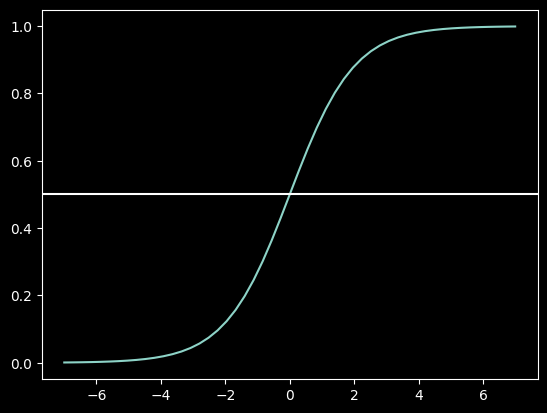

In [92]:
plt.plot(z, sigmoid(z))
plt.axhline(0.5)

In [94]:
def linear_regression(xi, b, w):
    result = 0
    
    for j in range(len(xi)):
        result += xi[j] * w[j]
    
    return result + b

In [95]:
def logistic_regression(xi, w0, w):
    score = 0
    for j in range(len(xi)):
        score += xi[j] * w[j]

    score += score + w0
    result = sigmoid(score)

    return result

#### **Training logistic regression with scikit-learn**

In [96]:
from sklearn.linear_model import LogisticRegression

In [117]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [119]:
model.intercept_[0]

-0.10903473724553074

In [120]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0089973 , 0.20451569, 0.21221455, ..., 0.13639293, 0.79976495,
       0.83740135])

In [126]:
y_pred.shape

(1409,)

In [127]:
y_pred

array([0.0089973 , 0.20451569, 0.21221455, ..., 0.13639293, 0.79976495,
       0.83740135])

In [121]:
churn_decision = y_pred >= 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [122]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [123]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [112]:
(y_val == churn_decision).mean()

0.8034066713981547

In [124]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204516,0,0
2,0.212215,0,0
3,0.543049,1,1
4,0.213779,0,0
5,0.205343,0,0
6,0.027791,0,0
7,0.002985,0,0
8,0.582262,1,1
...,...,...,...


In [125]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204516,0,0,True
2,0.212215,0,0,True
3,0.543049,1,1,True
4,0.213779,0,0,True
5,0.205343,0,0,True
6,0.027791,0,0,True
7,0.002985,0,0,True
8,0.582262,1,1,True
...,...,...,...,...


##### **Model Interpretation**

* Look at the coefficients
* Train a smaller model with fewer features